0.95
Early stopping at epoch 116


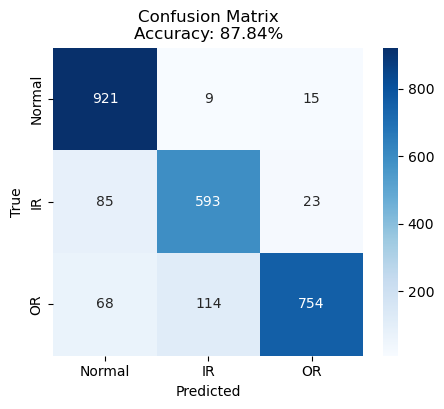

 - Model accuracy: 87.84%


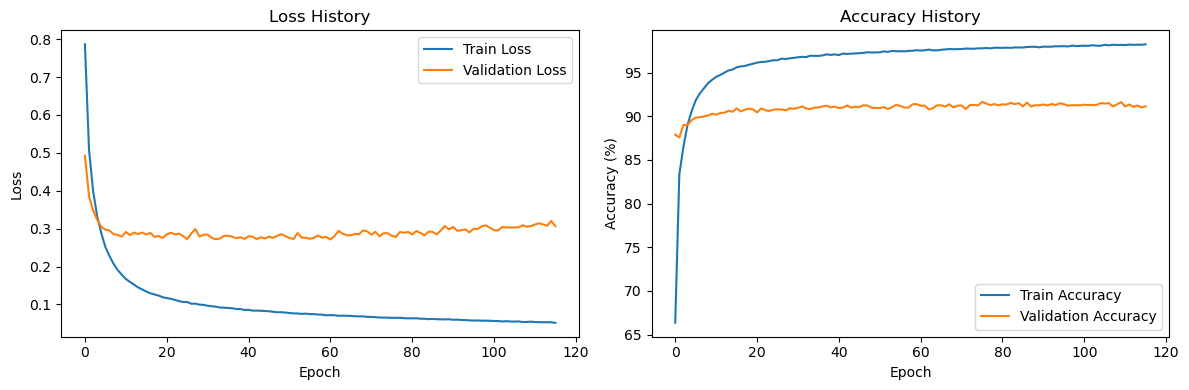

0.95


In [ ]:
import cfg
from src import data_loader as data_loader, models, trainer, evaluate
from torchinfo import summary
import torch.nn as nn
import torch.optim as optim
import numpy as np

accuracy_list = []

for i in range(30):
    trainer.set_seed(i)

    X_train, Y_train, X_val, Y_val, X_test, Y_test, test_files, len_processed = data_loader.data_import(cfg, 500)
    X_train = X_train *1e2
    X_val = X_val *1e2
    X_test = X_test *1e2
    train_loader, val_loader, test_loader = data_loader.create_dataloaders(X_train, Y_train, X_val, Y_val,X_test, Y_test, cfg, len_processed)

    model = models.Deeper1DCNN(1, cfg.NUM_CLASSES)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr= cfg.LEARNING_RATE, weight_decay=1e-1) #weight_decay=1e-4
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max= cfg.NUM_EPOCHS, eta_min=cfg.LEARNING_RATE *1e-2)

    trained_model, history = trainer.train_model(model, train_loader, val_loader, criterion, optimizer, 'test.pth', scheduler, num_epochs=cfg.NUM_EPOCHS, device=cfg.DEVICE)

    accuracy = evaluate.plot_confusion_matrix(trained_model, test_loader, 'cpu', cfg.CLASS_NAMES)
    accuracy_list.append(accuracy)
    evaluate.plot_history(history)

print('='*20)
print('Mean accuracy:', np.mean(accuracy_list))
print('Std accuracy:', np.std(accuracy_list))